In [ ]:
# !pip install tensorflow_decision_forests
!pip install tensorflow_addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import sklearn.metrics as sm
import keras.backend as K

from tensorflow.keras.metrics import AUC
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, Conv2D, MaxPool1D, AvgPool1D, MaxPool2D, Flatten, Input, Add, Dropout, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# import tensorflow_decision_forests as tfdf
from google.colab import drive

# import tensorflow_addons as tfa
from sklearn.decomposition import KernelPCA
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import RandomForestClassifier


**DATA LOADING**

In [ ]:
!unzip geometric.data.zip

Streaming output truncated to the last 5000 lines.
  inflating: d/Q9NXV2.63.3drx-assembly-1_renum.csv  
  inflating: d/Q9NXV2.74.3drx-assembly-1_renum.csv  
  inflating: d/Q9NY12.80.7trc-assembly-1_renum.csv  
  inflating: d/Q9NY12.86.7trc-assembly-1_renum.csv  
  inflating: d/Q9NY12.88.7trc-assembly-1_renum.csv  
  inflating: d/Q9NY25.161.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY25.175.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY25.183.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY25.71.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY25.82.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY25.99.2yhf-assembly-1_renum.csv  
  inflating: d/Q9NY33.147.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY33.176.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY33.19.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY33.509.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY33.519.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY33.654.7oup-assembly-1_renum.csv  
  inflating: d/Q9NY56.166.4run-assembly-

In [ ]:
# Upload csv with data into dataframe

df_data = pd.read_csv('structural.data.csv')
df_data.head(20)

,site,depth,absolute_sasa,hse_up,hse_down,coord_number,rsa,h_nho1,h_ohn1,h_nho2,...,basic,acidic,polar,cysteine,structural,aliphatic,aromatic,KB05,KB03,KB02
0,A0AVT1 156,4.749876,0.000000,25,21,46,0.000000,-1.1,-2.5,-0.2,...,0.200000,0.000000,0.200000,0.000000,0.000000,0.600000,0.000000,34.899214,45.060886,27.759431
1,A0AVT1 174,5.152328,0.000000,23,12,35,0.000000,-2.8,-1.9,-0.2,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.250000,0.250000,54.071507,60.342707,39.942943
2,A0AVT1 231,2.897858,0.000000,19,13,32,0.005988,-2.4,-0.2,-0.3,...,0.200000,0.000000,0.400000,0.000000,0.000000,0.200000,0.200000,19.986191,25.642393,15.078929
3,A0AVT1 546,2.153107,18.247627,7,19,26,0.125749,-1.6,-1.7,-0.1,...,0.166667,0.000000,0.333333,0.000000,0.166667,0.166667,0.166667,57.928093,29.467579,20.058971
4,A0AVT1 581,5.508338,0.849487,25,16,41,0.000000,-2.5,-1.8,-0.2,...,0.166667,0.166667,0.333333,0.000000,0.000000,0.333333,0.000000,14.641385,28.383329,20.264121
5,A0AVT1 699,4.144521,0.000000,19,16,35,0.000000,-1.4,-2.4,-0.2,...,0.000000,0.000000,0.250000,0.000000,0.125000,0.500000,0.125000,41.430762,41.969850,29.387195
6,A0AVT1 924,2.043005,3.486715,22,13,35,0.047904,-1.8,-2.3,-0.3,...,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333,19.347893,26.485490,19.812493
7,A0FGR8 210,2.659243,14.751210,13,16,29,0.077844,-2.7,-2.1,-0.2,...,0.000000,0.166667,0.166667,0.000000,0.166667,0.333333,0.166667,52.291610,57.192185,29.354262
8,A0FGR8 611,2.284932,51.016951,6,15,21,0.329341,-1.2,-2.7,0.0,...,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,40.480671,38.584178,32.077577
9,A0FGR8 810,3.212711,1.071459,25,13,38,0.023952,-1.8,-0.3,-0.3,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000,0.000000,50.558111,63.566794,46.470256


In [ ]:
#Obtain list of paths to distance matrix files

neighbor_files_a = []
neighbor_files_b = []
neighbor_files_c = []
neighbor_files_d = []
neighbor_dir_list = [['a/', neighbor_files_a], ['b/', neighbor_files_b], ['c/', neighbor_files_c], ['d/', neighbor_files_d]]

for folder in neighbor_dir_list:
  folder[1].extend(sorted(os.listdir(folder[0])))
  folder[1] = [folder[0] + x for x in folder[1]]

In [ ]:
neighbor_files = []
for x in neighbor_dir_list:
  neighbor_files.extend(x[1])

# Getting accession name and attaching it to cysteine site
short_neighbor_files = [x.replace(group[0], '') for group in neighbor_dir_list for x in group[1]]
accessions = [str(x.split('.')[0] + '_C' + x.split('.')[1]) for x in short_neighbor_files]

#SKIP PRODUCTION OF DICTIONARY WHEN YOU GET A CHANCE
neighbor_dict = {}
for i in range(len(neighbor_files)):
     neighbor_dict[accessions[i]] = pd.read_csv(neighbor_files[i], header = None)


In [ ]:
try:
  df_data['site'] = df_data['site'].apply(lambda x: x.split(' ')).apply(lambda x: str(x[0]) + '_C' + str(x[1]))
except IndexError:
  print('Dataframe already modified')

#Choose only neighbor matrices for cysteines present in the dataset
neighbor_dict_cp = neighbor_dict.copy()

print(len(neighbor_dict_cp))

i=0
for k in neighbor_dict:
  # print(str(k) + 'and in the dict: ' + str(list(df_data['site'].values)[i]).split('_')[0])
  if k not in list(df_data['site'].values):
    del neighbor_dict_cp[k]




57589


**PREPROCESSING**

In [ ]:
#Start by predicting on ligandibility with KB03 only

def preprocess_fragdata(fragment):
  #Drop cols for other 2 fragments
  frag_cols = [x for x in df_data.columns if 'KB' in x]
  rem_frags = [x for x in frag_cols if x != fragment]

  df_data_frag = df_data.drop(columns=rem_frags)
  print(df_data_frag["KB03"].mean())


  #One-hot-encode 'struct_motif' column
  df_data_frag = pd.get_dummies(df_data_frag, columns = ['struct_motif'])

  #Threshold KB03 columns to create binary classification problem
  if fragment == 'KB03':
    df_data_frag.loc[(df_data_frag[fragment] >= 0) & (df_data_frag[fragment] <= 15), fragment] = 0
    df_data_frag.loc[df_data_frag[fragment] > 60, fragment] = 1
  else:
    df_data_frag.loc[df_data_frag[fragment] < .6, fragment] = 0
    df_data_frag.loc[df_data_frag[fragment] >= .7, fragment] = 1

  #Drop rows where values is not 0 or 1, and make those rows into a new "unclassified" dataframe
  df_data_frag_unclass = df_data_frag.drop(df_data_frag[(df_data_frag[fragment] == 0) | (df_data_frag[fragment] == 1)].index)
  df_data_frag_class = df_data_frag.drop(df_data_frag[(df_data_frag[fragment] != 0) & (df_data_frag[fragment] != 1)].index)

  print(f"Remaining: {len(df_data_frag_unclass)}")
  print(f"Thresholded: {len(df_data_frag_class)}")

  # The second df has only the extremely thresholded cysteines
  return df_data_frag_class


In [ ]:
#Get indices as to stratify evenly among training and validation
def data_set_gen(df, fragment):

  #Obtain datframe with specific framgent
  df_data_frag_class = preprocess_fragdata(fragment)

  # Generate counts for each class in thresholded dataset
  num_class_1 = df_data_frag_class[df_data_frag_class[fragment] == 1][fragment].count()
  num_class_0 = df_data_frag_class[df_data_frag_class[fragment] == 0][fragment].count()

  tv_idxs, test_idxs = train_test_split(np.arange(df_data_frag_class.shape[0]),
                                        test_size = 0.1,
                                        random_state = 123,
                                        stratify=df_data_frag_class[fragment])

  X_test = df_data_frag_class.drop(columns=['site', fragment]).iloc[test_idxs]
  y_test = df_data_frag_class[fragment].iloc[test_idxs]

  X_train, X_val, y_train, y_val, train_idxs, val_idxs = train_test_split(df_data_frag_class.drop(columns=['site', fragment]).iloc[tv_idxs].to_numpy(),
                                                          df_data_frag_class[fragment].iloc[tv_idxs].to_numpy(),
                                                          tv_idxs,
                                                          test_size = 0.2,
                                                          random_state = 123,
                                                          stratify = df_data_frag_class[fragment].iloc[tv_idxs].to_numpy())

  #Create neighbor_train and neighbor_val
  neighbor_train = np.asarray([neighbor_dict[x] for x in list(df_data_frag_class.iloc[train_idxs]['site'].values)])
  neighbor_val = np.asarray([neighbor_dict[x] for x in list(df_data_frag_class.iloc[val_idxs]['site'].values)])
  neighbor_test = np.asarray([neighbor_dict[x] for x in list(df_data_frag_class.iloc[test_idxs]['site'].values)])

  # #Normalize preditor column values (for faster CNN convergence)
  scaler = StandardScaler()

  X_train = scaler.fit_transform(X_train)
  X_val = scaler.fit_transform(X_val)
  X_test = scaler.fit_transform(X_test)

  #For conversion to tensor
  print(f'Sample of X_train data before: {X_train[0].shape}')
  X_train = np.asarray(X_train).astype(np.float32)
  X_val = np.asarray(X_val).astype(np.float32)
  X_test = np.asarray(X_test).astype(np.float32)
  y_train = np.asarray(y_train).astype(np.float32)
  y_val = np.asarray(y_val).astype(np.float32)
  y_test = np.asarray(y_test).astype(np.float32)

  print(f'Sample of X_train data after conversion: {X_train[0].shape}')

  neighbor_train = np.asarray(neighbor_train).astype(np.float32).transpose(0,2,1)
  neighbor_val = np.asarray(neighbor_val).astype(np.float32).transpose(0,2,1)
  neighbor_test = np.asarray(neighbor_test).astype(np.float32).transpose(0,2,1)

  print(neighbor_train.shape)
  # transpose(neighbor_val)

  BATCH_SIZE = 5
  train_set = tf.data.Dataset.from_tensor_slices(((X_train, neighbor_train), y_train)).shuffle(2000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
  val_set = tf.data.Dataset.from_tensor_slices(((X_val, neighbor_val), y_val)).shuffle(2000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
  raw_train = ((X_train, neighbor_train), y_train)
  raw_val = ((X_val, neighbor_val), y_val)
  test_set = ((X_test, neighbor_test), y_test)

  #Create dataset without neighbor matrices (leaving only tabular dataset)
  no_neighbor_train_set = (X_train, y_train)
  no_neighbor_test_set = (X_test, y_test)

  return train_set, val_set, raw_train, raw_val, test_set, train_idxs, val_idxs, test_idxs, num_class_1, num_class_0, no_neighbor_train_set, no_neighbor_test_set




**PRELIMINARY ANALYSIS**

Text(0, 0.5, 'Frequency')

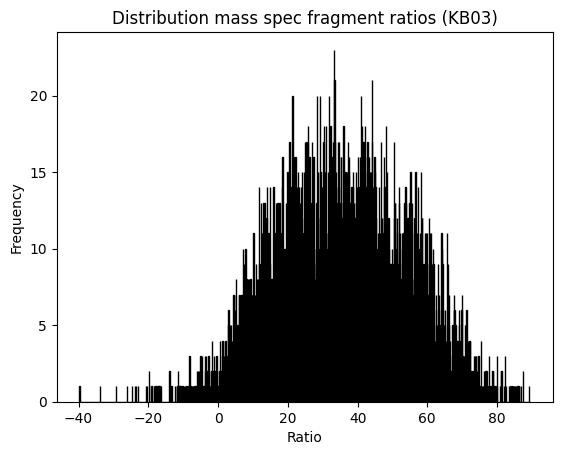

In [ ]:

plt.hist(df_data["KB03"], edgecolor='black', color="blue", bins=np.arange(min(df_data["KB03"]), max(df_data["KB03"]), 0.1))
plt.title("Distribution mass spec fragment ratios (KB03)")
plt.xlabel("Ratio")
plt.ylabel("Frequency")

35.79657189402211
Remaining: 5085
Thresholded: 1430
                   depth  absolute_sasa    hse_up  hse_down  coord_number  \
depth           1.000000      -0.131224  0.147282  0.068354      0.151219   
absolute_sasa  -0.131224       1.000000 -0.735871 -0.213238     -0.669613   
hse_up          0.147282      -0.735871  1.000000  0.040531      0.743006   
hse_down        0.068354      -0.213238  0.040531  1.000000      0.698849   
coord_number    0.151219      -0.669613  0.743006  0.698849      1.000000   
rsa            -0.113506       0.869818 -0.634080 -0.163209     -0.563234   
h_nho1         -0.034401       0.347202 -0.279529 -0.075655     -0.250780   
h_ohn1         -0.105406       0.302811 -0.162234 -0.242641     -0.278666   
h_nho2          0.003318       0.199543 -0.169468 -0.129638     -0.208151   
h_ohn2         -0.056575       0.177862 -0.083870 -0.149941     -0.160475   
tco            -0.012852      -0.015143  0.054623 -0.032097      0.017602   
kappa          -0.045347

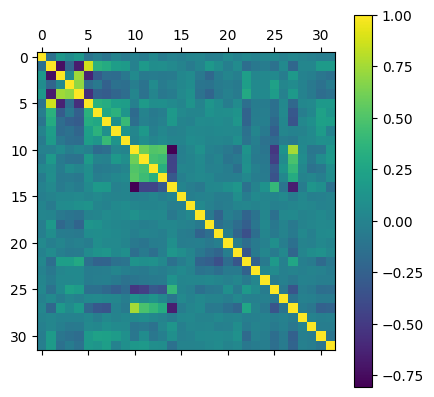

In [ ]:
df_data_frag_class = preprocess_fragdata("KB03")

plt.matshow(df_data_frag_class.drop(columns=['site', "KB03"]).corr())
plt.colorbar()
print(df_data_frag_class.drop(columns=['site', "KB03"]).corr())



**MODELS FOR PREDICTION**

In [ ]:
kb03_train_set, kb03_val_set, train_set, val_set, kb03_test_set, kb03_train_idxs, kb03_val_idxs, kb03_test_idxs, pos, neg, nn_train_set, nn_test_set = data_set_gen(df_data, 'KB03')

35.79657189402211
Remaining: 5085
Thresholded: 1430
Sample of X_train data before: (32,)
Sample of X_train data after conversion: (32,)
(1029, 20, 30)


In [ ]:
#RANDOM FOREST CLASSIFIER FOR BENCHMARK ON PERFORMANCE

model_1 = RandomForestClassifier()
model_1.fit(nn_train_set[0], nn_train_set[1])
print(model_1.score(nn_test_set[0], nn_test_set[1]))


#Vanilla random forest with no optimizations gets ~57%

0.5734265734265734


In [ ]:
num_feat = (32,)
nb_shape = (20,30,1)

batch_num_feat = (10,32,)
batch_nb_shape = (10,20,30,1)


#Build NN arcchitecture

def ff_feat_model(d_input):

  #Feed forward of data matrix
  #R variables reference activations at a higher level, which are then added to activations further along in the network (skip connections)

  R0 = Dense(100, activation='relu', name='dense_f_1', kernel_initializer='he_normal')(d_input)
  X = Dropout(.25)(R0)
  X = Dense(100, activation='relu', name='dense_f_2', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_0')([R0, X])
  RR1 = X
  X = BatchNormalization(name='bn_f_1')(X)
  X = Dropout(.25)(X)
  X = Dense(125, activation='relu', name='dense_f_3', kernel_initializer='he_normal')(X)
  R1 = X
  X = Dropout(.25)(X)
  X = Dense(125, activation='relu', name='dense_f_4', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_1')([R1, X])
  X = BatchNormalization(name='bn_f_2')(X)
  X = Dropout(.25)(X)
  X = Dense(175, activation='relu', name='dense_f_5', kernel_initializer='he_normal')(X)
  R2 = X
  X = Dropout(.25)(X)
  X = Dense(175, activation='relu', name='dense_f_6', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_2')([R2, X])
  X = BatchNormalization(name='bn_f_3')(X)
  X = Dropout(.25)(X)
  X = Dense(125, activation='relu', name='dense_f_7', kernel_initializer='he_normal')(X)
  R3 = X
  X = Dropout(.25)(X)
  X = Dense(125, activation='relu', name='dense_f_8', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_3')([R3, X])
  X = BatchNormalization(name='bn_f_4')(X)
  X = Dropout(.25)(X)
  X = Dense(100, activation='relu', name='dense_f_9', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_4')([RR1, X])
  R4 = X
  X = Dropout(.25)(X)
  X = Dense(100, activation='relu', name='dense_f_10', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_5')([R4, X])
  X = BatchNormalization(name='bn_f_5')(X)
  X = Dropout(.25)(X)
  X = Dense(50, activation='relu', name='dense_f_11', kernel_initializer='he_normal')(X)
  R5 = X
  X = Dropout(.25)(X)
  X = Dense(50, activation='relu', name='dense_f_12', kernel_initializer='he_normal')(X)
  X = Add(name='res_ff_6')([R5, X])


  return X

def conv_neigh_model(nb_input):

  #Convolution for neighbor matrix

  A = Conv1D(10, kernel_size=3, activation='relu', name='conv1', kernel_initializer='he_normal', input_shape=nb_input.shape[2:])(nb_input)
  A = Conv1D(20, kernel_size=3, activation='relu', name='conv2', kernel_initializer='he_normal', input_shape=A.shape[2:])(A)
  A = BatchNormalization(name='bn1')(A)
  A = Conv1D(25, kernel_size=3, activation='relu', name='conv3', kernel_initializer='he_normal', input_shape=A.shape[2:])(A)
  A = BatchNormalization(name='bn2')(A)
  A = Conv1D(50, kernel_size=3, activation='relu', name='conv4', kernel_initializer='he_normal', input_shape=A.shape[2:])(A)
  A = BatchNormalization(name='bn3')(A)
  A = Flatten()(A)
  A = Dense(20, activation='relu', name='dense_cn_1', kernel_initializer='he_normal')(A)
  A = Dense(50, activation='relu', name='dense_cn_2', kernel_initializer='he_normal')(A)
  A = BatchNormalization(name='bn_cn_1')(A)
  A = Dense(30, activation='relu', name='dense_cn_3', kernel_initializer='he_normal')(A)


  return A

def concat_model(num_feat, nb_shape):

  d_input = Input(shape=num_feat)
  nb_input = Input(shape=nb_shape)

  feats = ff_feat_model(d_input)
  dists = conv_neigh_model(nb_input)
  conv = tf.keras.layers.Concatenate(name='concat')([feats, dists])

  conv = Dense(25, activation='relu', name='dense_c_1', kernel_initializer='he_normal')(conv)
  conv = Dropout(.2)(conv)
  conv = Dense(30, activation='relu', name='dense_c_2', kernel_initializer='he_normal')(conv)
  conv = BatchNormalization(name='bn_c_1')(conv)
  conv = Dense(30, activation='relu', name='dense_c_3', kernel_initializer='he_normal')(conv)
  conv = Dropout(.2)(conv)
  conv = Dense(20, activation='relu', name='dense_c_4', kernel_initializer='he_normal')(conv)
  conv = BatchNormalization(name='bn_c_2')(conv)


  output = Dense(1, activation='sigmoid', name='dense_c_out')(conv)

  model = keras.Model(inputs=[d_input, nb_input], outputs=output, name="ligandibiliy_model")

  return model



In [ ]:
# Generate class weights and initiate training of neural network
total = pos+neg

weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

def auc(ypred, ytrue):
  return tf.metrics.auc(ytrue, ypred)

model_kb03 = concat_model(num_feat, nb_shape)
model_kb03.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])
model_kb03.summary()
history_kb03 = model_kb03.fit(kb03_train_set,
                              epochs=80,
                              validation_data=kb03_val_set,
                              callbacks=[tf.keras.callbacks.ModelCheckpoint(f'./kb03_model', monitor="val_accuracy", mode="max", save_best_only=True),
                                        ],
                              batch_size = 15,
                              class_weight = class_weight
                              )

Model: "ligandibiliy_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 32)]                 0         []                            
                                                                                                  
 dense_f_1 (Dense)           (None, 100)                  3300      ['input_15[0][0]']            
                                                                                                  
 dropout_91 (Dropout)        (None, 100)                  0         ['dense_f_1[0][0]']           
                                                                                                  
 dense_f_2 (Dense)           (None, 100)                  10100     ['dropout_91[0][0]']          
                                                                                 

**Performace Metrics**

5/5 [==============================] - 0s 52ms/step - loss: 0.9737 - accuracy: 0.6084 - auc_3: 0.6324
Test Loss: 0.9736761450767517
Test Accuracy: 0.6083915829658508
18
5/5 [==============================] - 0s 56ms/step
Custom Test Accuracy (Last Model): 0.5454545454545454
F1 Score (Last Model): 0.5695364238410596
Precision (Last Model): 0.4942528735632184
Recall (Last Model): 0.671875
ROC/AUC Score (Last): 0.63251582278481
Best Threshold for F1: 0.008213321
Best Threshold for Accuracy: 0.8826982


Text(0, 0.5, 'Precision')

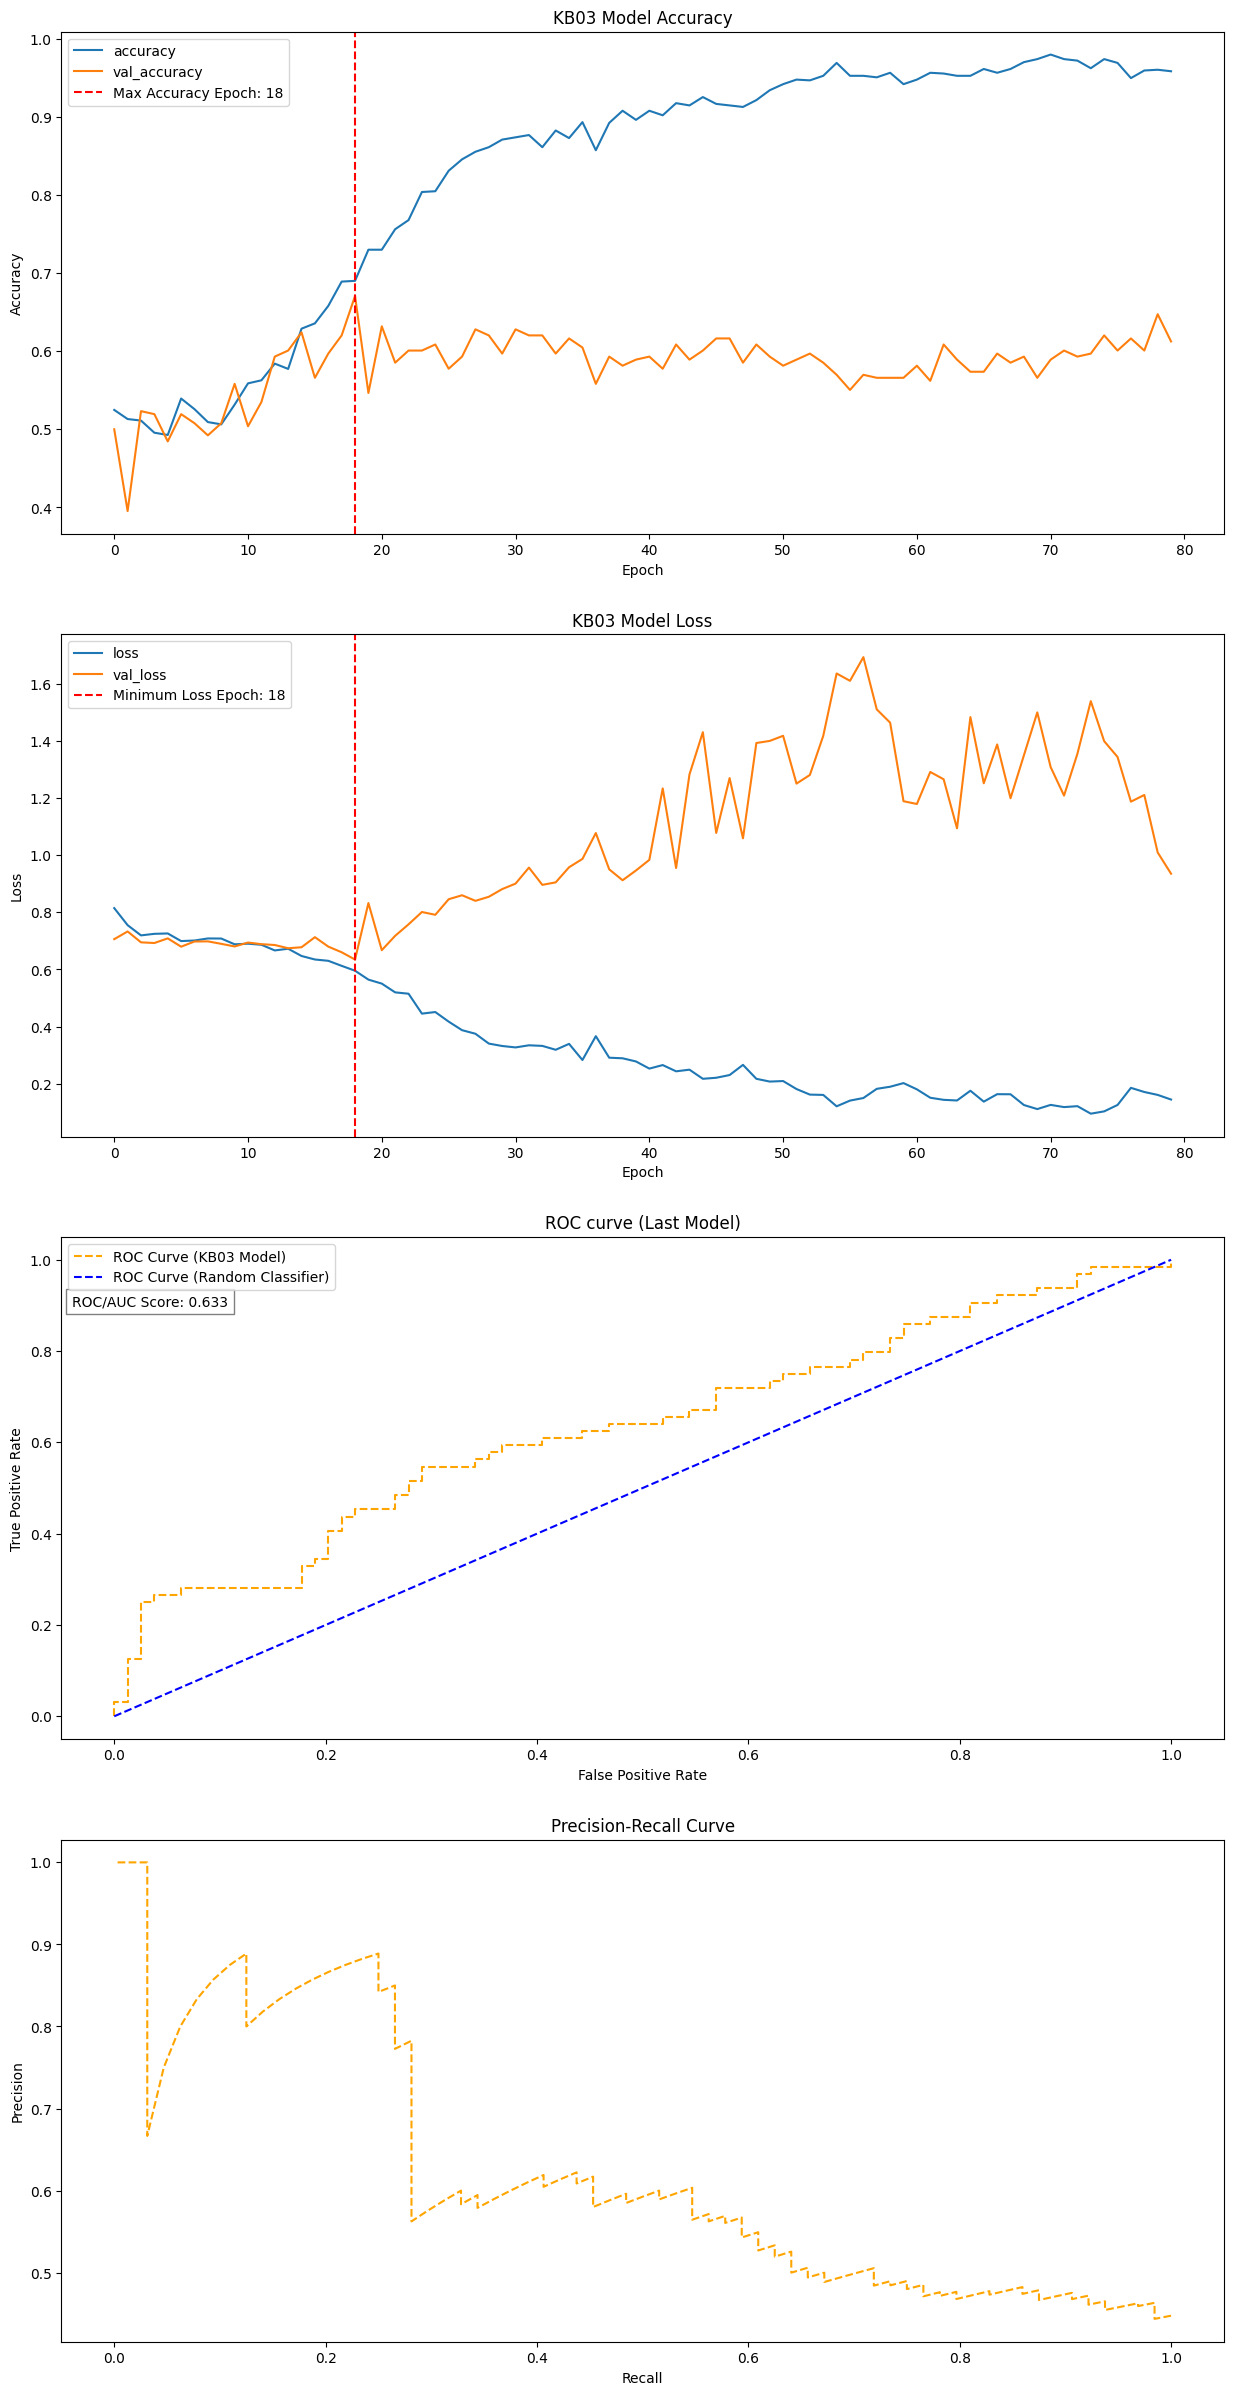

In [74]:
#Model metrics and evaluation (for in session model)

test_loss, test_accuracy, test_auc = model_kb03.evaluate(kb03_test_set[0], kb03_test_set[1])

print('Test Loss: ' + str(test_loss))
print('Test Accuracy: ' + str(test_accuracy))


fig, axs = plt.subplots(4,1, figsize=(15, 30))

#Plot both validation accuracy and loss of model for each epoch of training
plt.sca(axs[0])
best_epoch_acc = np.argmax(history_kb03.history['val_accuracy'])
print(best_epoch_acc)
plt.title('KB03 Model Accuracy')
plt.plot(history_kb03.history['accuracy'], label='accuracy')
plt.plot(history_kb03.history['val_accuracy'], label = 'val_accuracy')
plt.axvline(x=best_epoch_acc, label = f'Max Accuracy Epoch: {best_epoch_acc}', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.sca(axs[1])
best_epoch_loss = np.argmin(history_kb03.history['val_loss'])
plt.title('KB03 Model Loss')
plt.plot(history_kb03.history['loss'], label='loss')
plt.plot(history_kb03.history['val_loss'], label = 'val_loss')
plt.axvline(x=best_epoch_loss, label = f'Minimum Loss Epoch: {best_epoch_loss}', linestyle='--', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



pred_probs_last = model_kb03.predict(kb03_test_set[0])
pred_classes = [1 if x[0] > 0.20 else 0 for x[0] in pred_probs_last]
print('Custom Test Accuracy (Last Model): ' + str(sm.accuracy_score(kb03_test_set[1], pred_classes)))
print("F1 Score (Last Model): " + str(sm.f1_score(kb03_test_set[1], pred_classes)))
print("Precision (Last Model): " + str(sm.precision_score(kb03_test_set[1], pred_classes)))
print("Recall (Last Model): " + str(sm.recall_score(kb03_test_set[1], pred_classes)))

roc_auc_score_kb03 = sm.roc_auc_score(kb03_test_set[1], pred_probs_last[:,0])
print("ROC/AUC Score (Last): " + str(roc_auc_score_kb03))

#Generate ROC curve with ROC/AUC score for last model
fpr1, tpr1, thresh1 = sm.roc_curve(kb03_test_set[1], pred_probs_last[:,0], pos_label=1)

ref_line = np.linspace(0, 1)

plt.sca(axs[2])

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label = "ROC Curve (KB03 Model)")
plt.plot(ref_line, ref_line, linestyle='--', color='blue', label="ROC Curve (Random Classifier)")
plt.text(-0.040, 0.9, "ROC/AUC Score: {:.3f}".format(roc_auc_score_kb03), bbox={"facecolor":"white", "alpha": 0.5})
# title
plt.title('ROC curve (Last Model)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')
plt.legend()



#Generate precision-recall curve to evaluate model at diff thresholds
prec1, recall1, thresh1 = sm.precision_recall_curve(kb03_test_set[1], pred_probs_last[:,0], pos_label=1)



#Find threshold that maximizes F1-score and accuracy, respectively
max_i = 0
max_f1 = 0
for i in range(len(prec1)):
  curr = (2*(prec1[i]*recall1[i]))/(prec1[i]+recall1[i])
  if max_f1 <= curr:
    max_f1 = curr
    max_i = i

print("Best Threshold for F1: " + str(thresh1[max_i]))

max_j = 0
max_acc = 0
for j in range(len(thresh1)):
  curr_preds = [1 if x[0] > thresh1[j] else 0 for x[0] in pred_probs_last]
  curr = sm.accuracy_score(kb03_test_set[1], curr_preds)
  if max_acc <= curr:
    max_acc = curr
    max_j = j

print("Best Threshold for Accuracy: " + str(thresh1[max_j]))


#Plot for prcision and recall of model
plt.sca(axs[3])

plt.plot(recall1, prec1, linestyle='--',color='orange')
# title
plt.title('Precision-Recall Curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')


#Save last model if its an improvement over previous iterations
# model_kb03.save('drive/MyDrive/pbcnn_files8_12_23_70p_2')


[0.0, 0.0, 0.0, 0.012658227848101266, 0.012658227848101266, 0.02531645569620253, 0.02531645569620253, 0.0379746835443038, 0.0379746835443038, 0.05063291139240506, 0.05063291139240506, 0.08860759493670886, 0.08860759493670886, 0.12658227848101267, 0.12658227848101267, 0.1518987341772152, 0.1518987341772152, 0.17721518987341772, 0.17721518987341772, 0.189873417721519, 0.189873417721519, 0.21518987341772153, 0.21518987341772153, 0.22784810126582278, 0.22784810126582278, 0.24050632911392406, 0.24050632911392406, 0.25316455696202533, 0.25316455696202533, 0.27848101265822783, 0.27848101265822783, 0.2911392405063291, 0.2911392405063291, 0.3037974683544304, 0.3037974683544304, 0.31645569620253167, 0.31645569620253167, 0.35443037974683544, 0.35443037974683544, 0.379746835443038, 0.379746835443038, 0.3924050632911392, 0.3924050632911392, 0.4050632911392405, 0.4050632911392405, 0.4177215189873418, 0.4177215189873418, 0.4430379746835443, 0.4430379746835443, 0.4810126582278481, 0.4810126582278481, 

Model: "ligandibiliy_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 32)]                 0         []                            
                                                                                                  
 dense_f_1 (Dense)           (None, 100)                  3300      ['input_15[0][0]']            
                                                                                                  
 dropout_91 (Dropout)        (None, 100)                  0         ['dense_f_1[0][0]']           
                                                                                                  
 dense_f_2 (Dense)           (None, 100)                  10100     ['dropout_91[0][0]']          
                                                                                 

Text(0, 0.5, 'Precision')

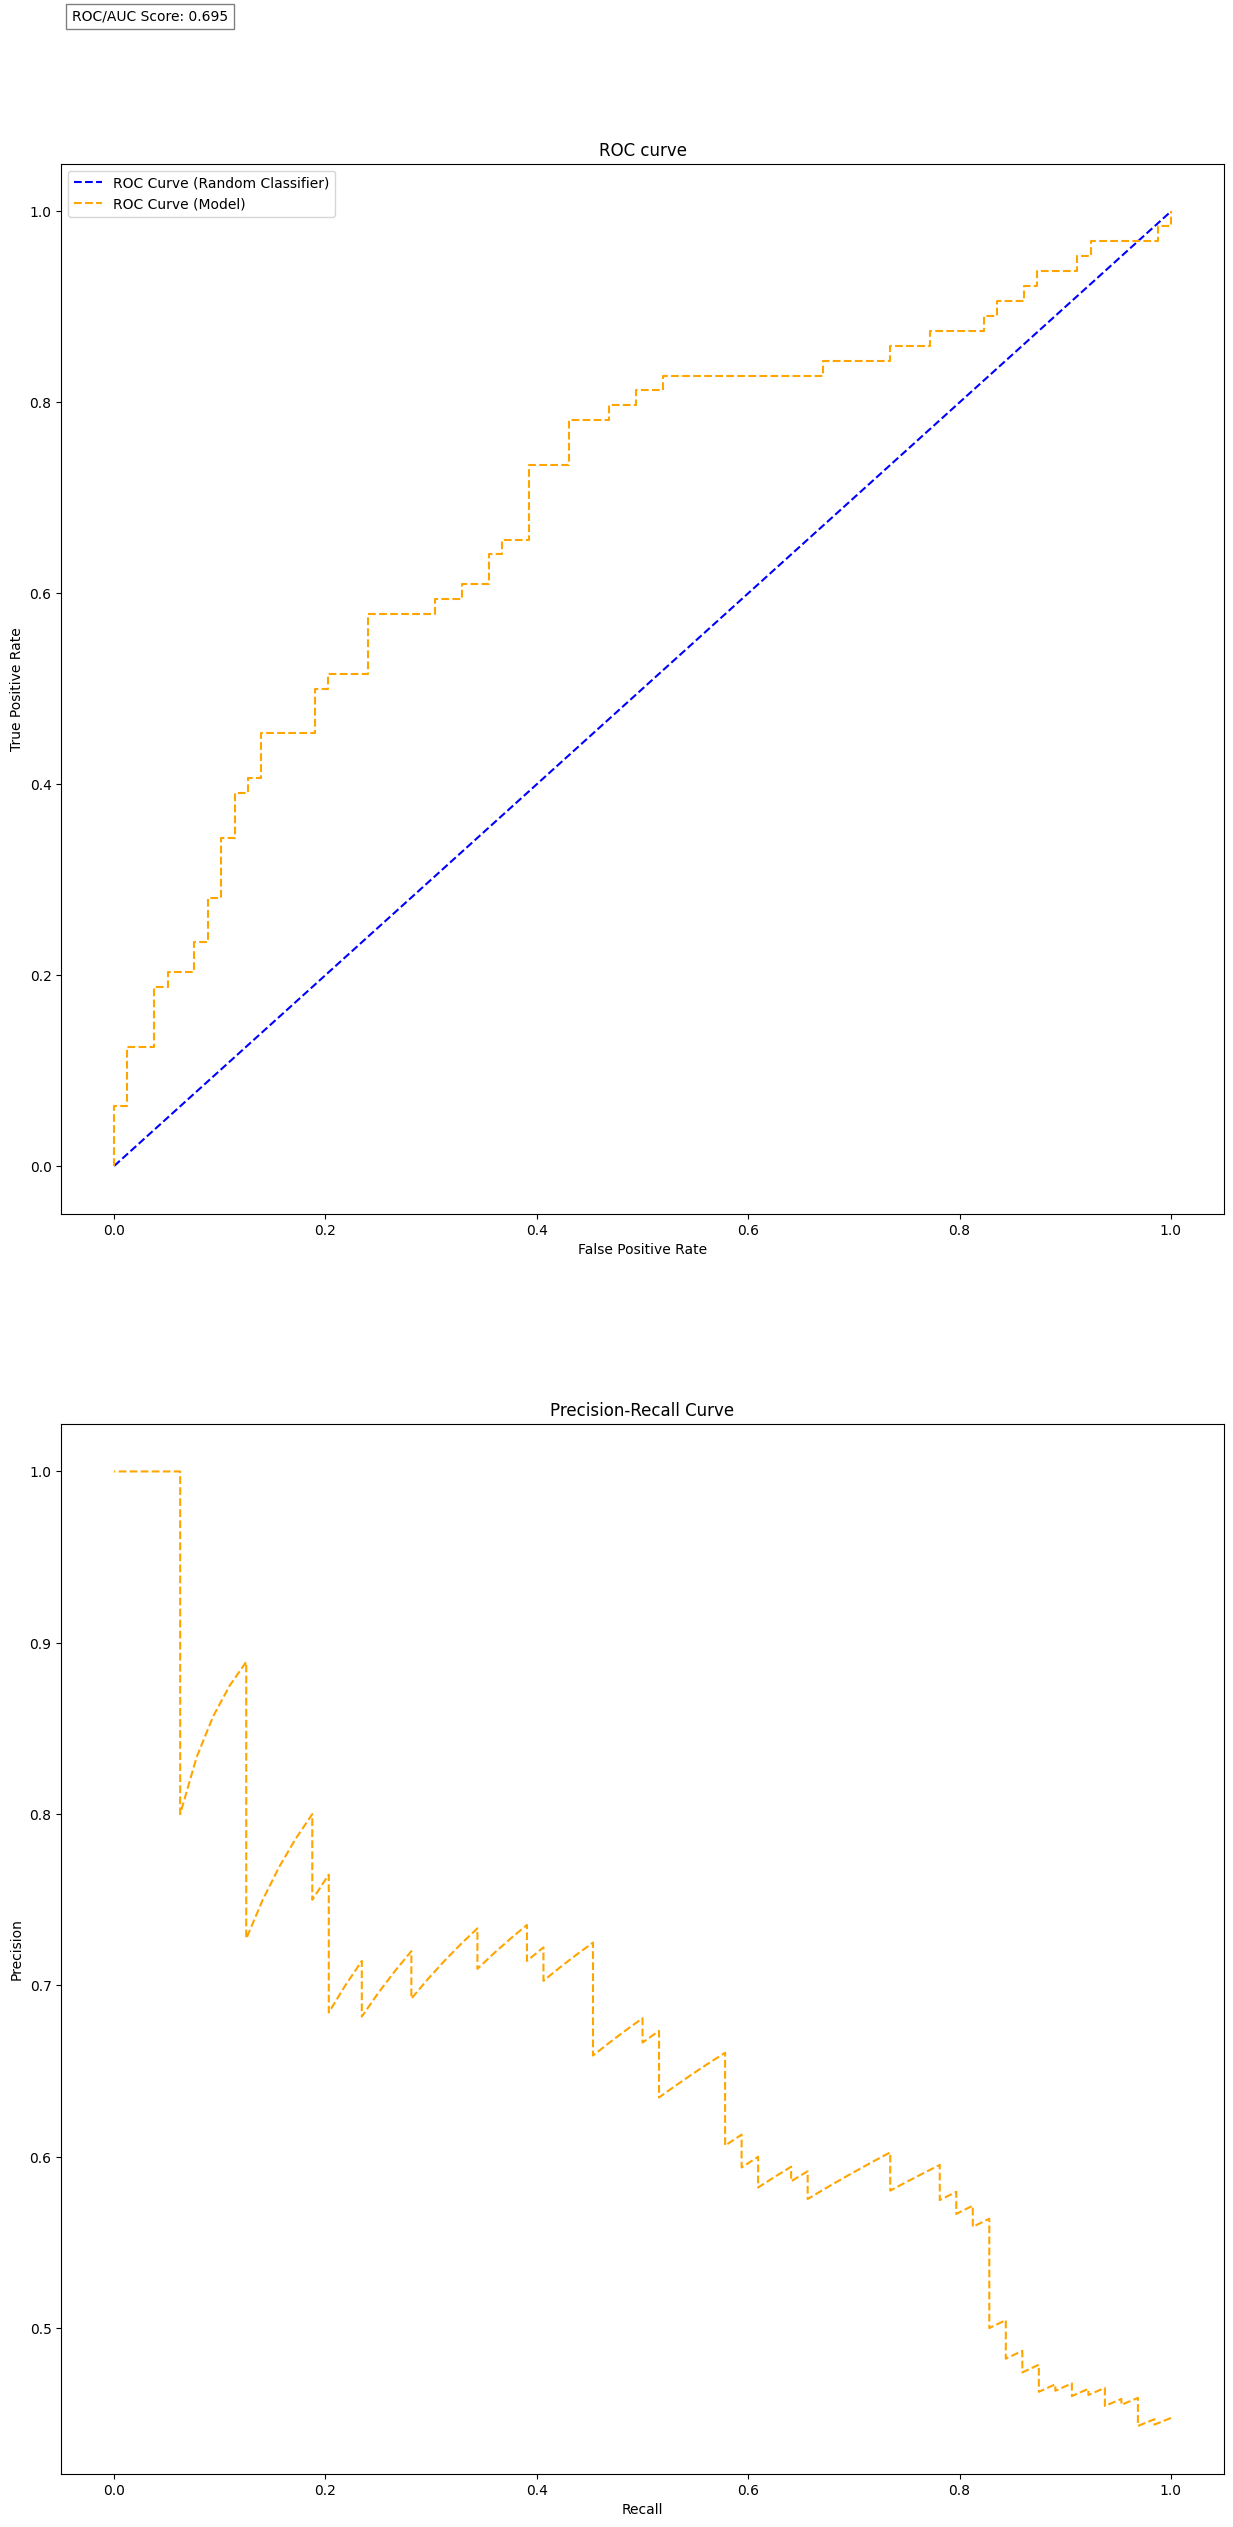

In [80]:
#Model evaluation (for saved model)

fig, axs = plt.subplots(2,1, figsize=(15, 30))

#Load model saved from checkpoint (or model saved locally)
# best_model = tf.keras.models.load_model('/content/kb03_model')
best_model = tf.keras.models.load_model('/content/drive/MyDrive/pdbcnn_files4_17_24/kb03_model')
best_model.summary()

test_loss, test_accuracy, test_auc = best_model.evaluate(kb03_test_set[0], kb03_test_set[1])

#Adjustable threshold to be used for experimenting with model
custom_thresh = .5
print('Test Loss: ' + str(test_loss))
print('Test Accuracy: ' + str(test_accuracy))
#Calculate F1 score (to guage effect of class imbalance)
pred_probs_hv = best_model.predict(kb03_test_set[0])
pred_classes = [1 if x[0] > custom_thresh else 0 for x[0] in pred_probs_hv]

#Generate useful metrics for evaluating model
print(f'Test Accuracy (Threshold of {custom_thresh}): ' + str(sm.accuracy_score(kb03_test_set[1], pred_classes)))
print("F1 Score: " + str(sm.f1_score(kb03_test_set[1], pred_classes)))
print("Precision: " + str(sm.precision_score(kb03_test_set[1], pred_classes)))
print("Recall: " + str(sm.recall_score(kb03_test_set[1], pred_classes)))

#Generate ROC/AUC score
roc_auc_score_kb03 = sm.roc_auc_score(kb03_test_set[1], pred_probs_hv[:,0])
print("ROC/AUC Score: " + str(roc_auc_score_kb03))

#Generate false positive rate and true positive rate
fpr2, tpr2, thresh1 = sm.roc_curve(kb03_test_set[1], pred_probs_hv[:,0], pos_label=1)
ref_line = np.linspace(0, 1)


data = [fpr2, tpr2]
with open("file.txt", "w") as file:
  for line in data:
    file.write(",".join([str(x) for x in line]))
    file.write("\n")

print(len(fpr2))

#Plot FPR and TPR as ROC curve
plt.sca(axs[0])

plt.plot(ref_line, ref_line, linestyle='--', color='blue', label="ROC Curve (Random Classifier)")
plt.text(-0.040, 1.2, "ROC/AUC Score: {:.3f}".format(roc_auc_score_kb03), bbox={"facecolor":"white", "alpha": 0.5})
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label = "ROC Curve (Model)")
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')
plt.legend()


#Generate precision-recall curve to evaluate model at diff thresholds
prec2, recall2, thresh2 = sm.precision_recall_curve(kb03_test_set[1], pred_probs_hv[:,0], pos_label=1)


#Find threshold that maximizes F1-score and accuracy, respectively
max_i = 0
max_f1 = 0
for i in range(len(prec2)):
  curr = (2*(prec2[i]*recall2[i]))/(prec2[i]+recall2[i])
  if max_f1 <= curr:
    max_f1 = curr
    max_i = i

print("Best Threshold for F1: " + str(thresh1[max_i]))

#Find the most optimal threshold in the model for the highest accuracy score
max_j = 0
max_acc = 0
for j in range(len(thresh2)):
  curr_preds = [1 if x[0] > thresh2[j] else 0 for x[0] in pred_probs_hv]
  curr = sm.accuracy_score(kb03_test_set[1], curr_preds)
  if max_acc <= curr:
    max_acc = curr
    max_j = j

print("Best Threshold for Accuracy: " + str(thresh2[max_j]))

#Plot precision and recall scores as a curve
plt.sca(axs[1])

plt.plot(recall2, prec2, linestyle='--',color='orange')
# title
plt.title('Precision-Recall Curve')
# x label
plt.xlabel('Recall')
# y label
plt.ylabel('Precision')